In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/eeg-brainwave-dataset-mental-state/mental-state.csv


In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

import tensorflow as tf

from sklearn.metrics import confusion_matrix, classification_report




In [3]:
data = pd.read_csv('/kaggle/input/eeg-brainwave-dataset-mental-state/mental-state.csv')

In [4]:
data.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
lag1_mean_0,2479.0,23.584351,10.543938,-35.224945,18.732076,23.553828,27.759551,92.313766
lag1_mean_1,2479.0,27.060411,24.252348,-369.150109,21.328936,27.574535,32.247539,408.180215
lag1_mean_2,2479.0,20.452931,72.104439,-579.490660,17.124174,25.217098,30.746496,591.014113
lag1_mean_3,2479.0,11.526044,19.196870,-251.495367,6.541236,15.144375,20.589852,69.694520
lag1_mean_d_h2h1_0,2479.0,0.014449,13.382998,-75.143730,-4.647636,-0.140909,3.965898,104.963158
...,...,...,...,...,...,...,...,...
freq_720_3,2479.0,0.007998,0.007547,0.000041,0.002034,0.006005,0.011406,0.054104
freq_730_3,2479.0,0.007449,0.006937,0.000008,0.001985,0.005717,0.010768,0.060196
freq_740_3,2479.0,0.007307,0.007379,0.000036,0.002042,0.005300,0.010208,0.134037
freq_750_3,2479.0,0.007382,0.007276,0.000048,0.001964,0.005315,0.010330,0.071582


In [5]:
data['Label'].value_counts()

2.0    830
1.0    830
0.0    819
Name: Label, dtype: int64

In [6]:
label_mapping = {'0.0': 0, '1.0': 1, '2.0': 2}

In [7]:
def preprocess_inputs(df):
    df = df.copy()
    
    df['Label'] = df['Label'].replace(label_mapping)
    
    y = df['Label'].copy()
    X = df.drop('Label', axis=1).copy()
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=123)
    
    return X_train, X_test, y_train, y_test

In [8]:
X_train, X_test, y_train, y_test = preprocess_inputs(data)

In [9]:
X_train

,lag1_mean_0,lag1_mean_1,lag1_mean_2,lag1_mean_3,lag1_mean_d_h2h1_0,lag1_mean_d_h2h1_1,lag1_mean_d_h2h1_2,lag1_mean_d_h2h1_3,lag1_mean_q1_0,lag1_mean_q1_1,...,freq_659_3,freq_669_3,freq_679_3,freq_689_3,freq_699_3,freq_709_3,freq_720_3,freq_730_3,freq_740_3,freq_750_3
1228,18.875113,109.092691,27.225469,21.305082,6.964365,-15.954065,1.519151,7.142496,9.836726,183.310949,...,0.001374,0.000885,0.001759,0.001849,0.003055,0.002243,0.001344,0.002476,0.001072,0.001993
1786,25.259023,33.327125,65.202727,20.902660,-5.224164,-1.682917,52.831583,3.791199,25.982024,33.077807,...,0.001785,0.000964,0.000331,0.000338,0.000653,0.001732,0.001741,0.001418,0.001131,0.000422
209,23.839953,-4.259078,-229.188941,18.785473,-2.485715,-134.148117,-218.643345,-4.466033,24.421032,122.103492,...,0.002227,0.000935,0.000849,0.002228,0.001262,0.000914,0.000905,0.000195,0.002664,0.000521
559,22.575363,25.228504,28.747578,15.377023,-0.500223,1.523311,-1.672705,0.148657,23.646387,25.656641,...,0.010222,0.008971,0.006954,0.006803,0.004954,0.004878,0.015575,0.008294,0.006240,0.005078
1984,40.058117,31.555164,-21.034246,34.946457,-23.371946,-1.930462,-148.455850,-22.091629,75.446352,31.389344,...,0.000105,0.000074,0.000048,0.000055,0.001028,0.000603,0.000446,0.000728,0.000142,0.000411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1147,21.083816,19.895563,18.968566,20.132062,8.458956,-6.960552,8.420081,13.663810,-20.390547,26.949771,...,0.024027,0.007333,0.014824,0.014703,0.011312,0.017288,0.011776,0.018456,0.004682,0.019357
2154,23.998289,29.361734,25.037762,-4.255297,-1.227794,1.397922,-9.106748,14.402332,26.220914,26.643806,...,0.002983,0.013251,0.012160,0.012330,0.009878,0.012761,0.019145,0.016046,0.007885,0.008731
1766,17.866137,20.019543,30.679723,12.689574,-1.507275,8.348476,-0.025243,-1.803082,23.460320,0.128398,...,0.013355,0.004366,0.007712,0.004192,0.009036,0.010538,0.005273,0.004098,0.002880,0.010289
1122,27.477242,24.162312,18.798824,21.366125,-4.486187,1.581129,4.359819,-4.935022,30.235438,22.084650,...,0.020998,0.009106,0.005606,0.006176,0.012413,0.005869,0.010038,0.009971,0.007039,0.008478


In [10]:
X_train.shape[1]

988

In [11]:
inputs = tf.keras.Input(shape=(X_train.shape[1],))

expand_dims = tf.expand_dims(inputs, axis=2)
x = tf.keras.layers.Dense(64, activation='relu')(inputs)
gru = tf.keras.layers.GRU(256, return_sequences=True)(expand_dims)
gru = tf.keras.layers.GRU(256, return_sequences=True)(gru)
flatten = tf.keras.layers.Flatten()(gru)

outputs = tf.keras.layers.Dense(3, activation='softmax')(flatten)


model = tf.keras.Model(inputs=inputs, outputs=outputs)
print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 988)]             0         
                                                                 
 tf.expand_dims (TFOpLambda)  (None, 988, 1)           0         
                                                                 
 gru (GRU)                   (None, 988, 256)          198912    
                                                                 
 gru_1 (GRU)                 (None, 988, 256)          394752    
                                                                 
 flatten (Flatten)           (None, 252928)            0         
                                                                 
 dense_1 (Dense)             (None, 3)                 758787    
                                                                 
Total params: 1,352,451
Trainable params: 1,352,451
Non-train

In [12]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [13]:
history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=32,
    epochs=50,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=5,
            restore_best_weights=True
        )
    ]
)

Epoch 1/50
44/44 [==============================] - 178s 4s/step - loss: 1.3960 - accuracy: 0.6895 - val_loss: 0.3403 - val_accuracy: 0.9020
Epoch 2/50
44/44 [==============================] - 172s 4s/step - loss: 0.2912 - accuracy: 0.8768 - val_loss: 0.2869 - val_accuracy: 0.9107
Epoch 3/50
44/44 [==============================] - 171s 4s/step - loss: 0.1752 - accuracy: 0.9352 - val_loss: 0.2429 - val_accuracy: 0.9251
Epoch 4/50
44/44 [==============================] - 170s 4s/step - loss: 0.0888 - accuracy: 0.9661 - val_loss: 0.2667 - val_accuracy: 0.9078
Epoch 5/50
44/44 [==============================] - 170s 4s/step - loss: 0.0589 - accuracy: 0.9834 - val_loss: 0.2123 - val_accuracy: 0.9424
Epoch 6/50
44/44 [==============================] - 170s 4s/step - loss: 0.0361 - accuracy: 0.9885 - val_loss: 0.1976 - val_accuracy: 0.9193
Epoch 7/50
44/44 [==============================] - 170s 4s/step - loss: 0.0350 - accuracy: 0.9878 - val_loss: 0.3018 - val_accuracy: 0.9251
Epoch 8/50
44

In [14]:
model_acc = model.evaluate(X_test, y_test, verbose=0)[1]
print("Test Accuracy: {:.3f}%".format(model_acc * 100))

Test Accuracy: 95.161%


In [15]:
y_pred = np.array(list(map(lambda x: np.argmax(x), model.predict(X_test))))

24/24 [==============================] - 30s 1s/step


24/24 [==============================] - 29s 1s/step


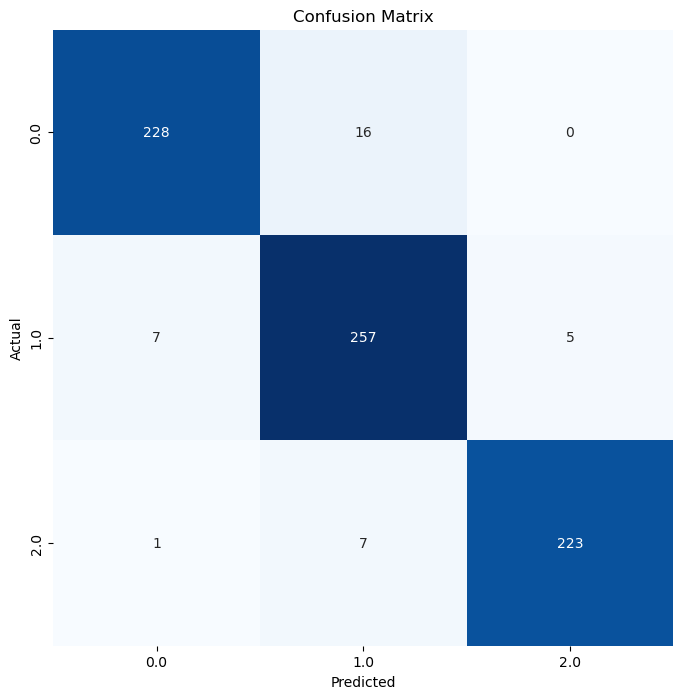

Classification Report:
----------------------
               precision    recall  f1-score   support

         0.0       0.97      0.93      0.95       244
         1.0       0.92      0.96      0.94       269
         2.0       0.98      0.97      0.97       231

    accuracy                           0.95       744
   macro avg       0.95      0.95      0.95       744
weighted avg       0.95      0.95      0.95       744



In [16]:
y_pred = np.array(list(map(lambda x: np.argmax(x), model.predict(X_test))))

cm = confusion_matrix(y_test, y_pred)
clr = classification_report(y_test, y_pred, target_names=label_mapping.keys())

plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, vmin=0, fmt='g', cbar=False, cmap='Blues')
plt.xticks(np.arange(3) + 0.5, label_mapping.keys())
plt.yticks(np.arange(3) + 0.5, label_mapping.keys())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n----------------------\n", clr)